<a href="https://colab.research.google.com/github/gen95mis/dataset/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![UNet model](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

[Source](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)

# Downloading dataset Cityscape

[Cityscapes Image Pairs](https://www.kaggle.com/dansbecker/cityscapes-image-pairs)

In [ ]:
import os
if os.path.isdir('./images') == False:
  !wget https://github.com/gen95mis/dataset/raw/main/images-1.zip?raw=true -O images-1.zip
  !wget https://github.com/gen95mis/dataset/raw/main/images-2.zip?raw=true -O images-2.zip
  !wget https://github.com/gen95mis/dataset/raw/main/labels.zip -O labels.zip
  
  !unzip images-1.zip
  !unzip images-2.zip
  !unzip labels.zip

  !rm images-1.zip
  !rm images-2.zip
  !rm labels.zip

  !mkdir images
  !cp -R images-1/* images
  !cp -R images-2/* images

  !rm -rf images-1
  !rm -rf images-2

# 1. Import packages

In [ ]:
import tensorflow as tf
import numpy as np 
import glob
from PIL import Image, ImageOps


# 2. The lables mark

In [ ]:
from collections import namedtuple

Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'color'       , # The color of this label
  ] 
)

In [ ]:
labels = [
  #       name                     id           color
  Label(  'Void'                  ,  0  ,        (0,0,0) ),
  Label(  'Car'                   ,  1  ,        (0,0,255) ), 
  Label(  'Road'                  ,  2  ,        (255,0,  0) ), #
  Label(  'Mark'                  ,  3  ,        ( 255,  255,  0) ), #
  Label(  'Building'              ,  4  ,        (  0,  255,  0) ), #
  Label(  'Sidewalk'              ,  5  ,        (  255,  0,  255) ), #
  Label(  'Tree/Bush'             ,  6  ,        ( 0,255,255) ), #
  Label(  'Pole'                  ,  7  ,        (255, 0,153) ), 
  Label(  'Sign'                  ,  8  ,        (153, 0,255) ), #
  Label(  'Person'                ,  9  ,        ( 0,153,255) ),
  Label(  'Wall'                  , 10  ,        (250,170,160) ),
  Label(  'Sky'                   , 11  ,        (230,150,140) ),
  Label(  'Curb'                  , 12  ,        ( 70, 70, 70) ),
  Label(  'Grass/Dirt'            , 13  ,        (102,102,156) ),
]

# Show image

In [ ]:
import matplotlib.pyplot as plt
def show_image(img):
  plt.imshow(img)
  plt.show()

# 3. Processing the images

In [ ]:
from sklearn.model_selection import train_test_split

x = list() # sorce image
y = list() # label image

image_dir = 'images'
image_filenames = os.listdir( image_dir )

labels_dir = 'labels'
labels_filenames = os.listdir( image_dir )

# New Section

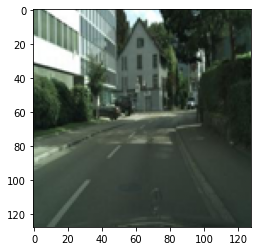

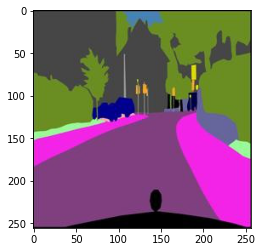

In [ ]:
#@markdown > The number of images to load from the dataset. By default 400 images are loaded.
num_images =  10#@param {type: "number" }

for filename in image_filenames[ 0 : num_images ]:
	image = Image \
		.open(os.path.join( image_dir, filename))
	x.append( np.asarray( ImageOps.crop( image, ( 0, 0, 256 , 0 ) ).resize( ( 128, 128 )) ) )
	# y.append( np.asarray( ImageOps.crop( image, (256, 0, 0, 0)).resize( ( 128 , 128 ) ) ))
	y.append( np.asarray( ImageOps.crop( image, (256, 0, 0, 0)) ))

 
x = np.array(x)/255
y = np.array(y)

# our shit
show_image(x[0])
show_image(y[0])

In [ ]:
#@markdown > Процент проверочных изображений. По умолчанию 0.4
test_size =  0.4#@param {type: "number" }
train_features, test_features, train_labels, test_labels = train_test_split(np.array(x), np.array(y),test_size=test_size)

In [ ]:
def binarize( pixel ):
  if np.array_equal( pixel , [244, 35, 232]):
    print(pixel)
    return np.array( [ 1 ] )
  else :
    return np.array( [ 0 ] )

In [ ]:
train_labels = np.apply_along_axis( binarize , axis=3 , arr=train_labels ) 
test_labels = np.apply_along_axis( binarize , axis=3 , arr=test_labels )

In [ ]:
output = set()
for img in y:
  for x in img:
    for z in x:
      output.add(np.array2string(z))
print(output)

{'[91 61 37]', '[ 99 124 155]', '[197 106 209]', '[245 170  45]', '[215  26  54]', '[71 72 32]', '[201  28  73]', '[123 144  85]', '[54 70 69]', '[ 97 111  94]', '[158  88   0]', '[189 233 182]', '[ 99 140  22]', '[ 85  50 108]', '[124 123  69]', '[189 226 183]', '[10  0 74]', '[109   0   2]', '[101 106 109]', '[136 191 162]', '[65 70 48]', '[ 45   0 109]', '[ 79 114 142]', '[74 77 82]', '[79 63 92]', '[238  39 228]', '[76 63 91]', '[138  65 134]', '[111 139  37]', '[66 70 73]', '[240  29 245]', '[67 70 53]', '[128   3  59]', '[106 143  38]', '[ 92 149  44]', '[46 63 19]', '[189  49 174]', '[105  23 108]', '[112  58  48]', '[14 21 93]', '[191  43  57]', '[200  30  56]', '[18 53 95]', '[182 168 165]', '[ 66  93 114]', '[ 83 136 167]', '[ 6  6 60]', '[227 225   0]', '[ 96 122  57]', '[ 99 148  20]', '[ 59  61 112]', '[110 139  29]', '[162  49 105]', '[220  29  70]', '[170  43  70]', '[193 150 144]', '[ 63 130 183]', '[154  37 107]', '[  0   2 159]', '[ 69 122 164]', '[131 137 213]', '[22